In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', '.*do not.*',)

In [74]:
# data source: `https://datasets.omdena.com/dataset/labor-stats-2005-2021-(texas--usa)`
df = pd.read_csv('Tx_LaborStats_2005-2021.csv')

In [75]:
df.shape

(16896, 9)

In [76]:
df['Period'].unique()

array(['March', 'June', 'September', 'December'], dtype=object)

In [77]:
#Num of Areas
len(df.Area.unique())

255

In [78]:
df['Area Type'].unique()

array(['Texas', 'County'], dtype=object)

In [79]:
df['Adjustment'].value_counts()['Adjusted']

66

In [80]:
df['Adjustment'].value_counts()['Not Adjusted']

16830

In [10]:
df = df.dropna()

In [81]:
df['Year'] = df['Year'].astype(str)

In [82]:
df.columns

Index(['Year', 'Period', 'Area', 'Area Type', 'Adjustment', 'Employment',
       'Civilian Labor Force', 'Unemployment', 'Unemployment Rate'],
      dtype='object')

In [83]:
# drop rows with value 'Adjusted' in 'Adjustment' column
df = df[df['Adjustment'] != 'Adjusted']

In [84]:
# Remove 'Column_A' from the DataFrame
df = df.drop('Adjustment', axis=1)

In [85]:
df['Employment'] = df['Employment'].astype(str).str.replace(',', '').astype(int)
df['Unemployment'] = df['Unemployment'].astype(str).str.replace(',', '').astype(int)
df['Civilian Labor Force'] = df['Civilian Labor Force'].astype(str).str.replace(',', '').astype(int)

In [86]:
df['Unemployment Rate'] = round((df['Unemployment']/df['Civilian Labor Force'])*100, 1)
df['Employment Rate'] = round((df['Employment']/df['Civilian Labor Force'])*100, 1)

In [87]:
# 
grouped_by_Period = df.groupby('Period')
group_means = grouped_by_Period[['Employment', 'Civilian Labor Force', 'Unemployment']].mean().round().astype(int)
period_means = round(group_means.astype(int))

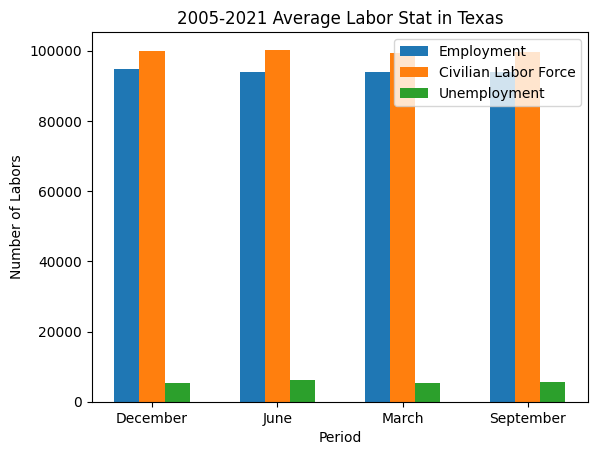

In [89]:
# Create a vertical bar plot

bar_width = 0.2

# Generate an array of x-coordinates for the bars
x = np.arange(len(group_means.index))

# Create a figure and axis
fig, ax = plt.subplots()

# Create the first set of bars
ax.bar(x - bar_width, group_means['Employment'], bar_width, label='Employment',)

# Create the second set of bars
ax.bar(x, group_means['Civilian Labor Force'], bar_width, label='Civilian Labor Force')

# # Create the second set of bars
ax.bar(x + bar_width, group_means['Unemployment'], bar_width, label='Unemployment')

# Set the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(group_means.index)

# Add labels and a title
ax.set_xlabel('Period')
ax.set_ylabel('Number of Labors')
ax.set_title('2005-2021 Average Labor Stat in Texas')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [90]:
grouped_by_year_period = df.groupby(['Year', 'Period'])

year_period_mean = grouped_by_year_period[['Employment', 'Civilian Labor Force', 'Unemployment']].mean().round().astype(int)
year_period_mean

Employment  Civilian Labor Force  Unemployment
Year Period                                                   
2005 December        83672                 88126          4454
     June            82800                 87699          4899
     March           82019                 86795          4776
     September       83057                 87975          4918
2006 December        85961                 89679          3718
...                    ...                   ...           ...
2020 June            98981                110386         11405
     March          103912                109441          5529
     September      100999                109756          8756
2021 June           103427                110799          7372
     March          102645                110542          7898

[66 rows x 3 columns]

In [91]:
# Define a condition, for example, select rows where the second level index is 'Jan'
# condition = df.index.get_level_values('Month') == 'Jan'

mar_df = year_period_mean[year_period_mean.index.get_level_values('Period') == 'March']
jun_df = year_period_mean[year_period_mean.index.get_level_values('Period') == 'June']
sep_df = year_period_mean[year_period_mean.index.get_level_values('Period') == 'September']
dec_df = year_period_mean[year_period_mean.index.get_level_values('Period') == 'December']

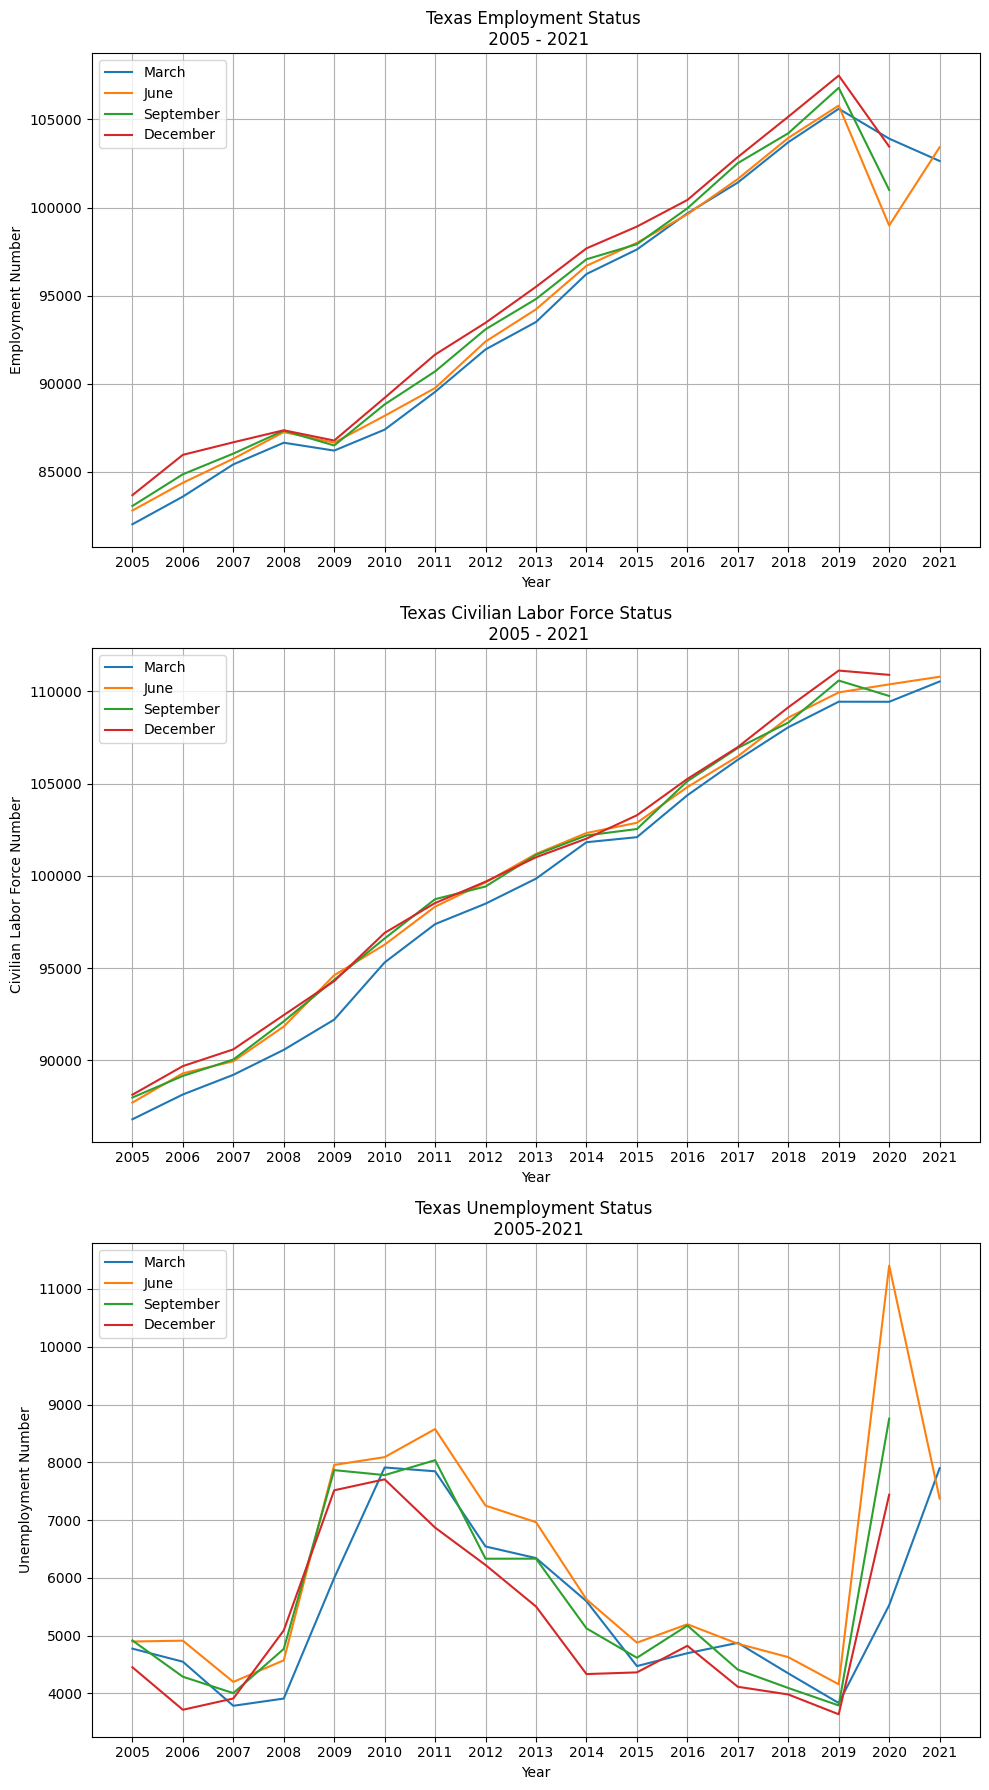

In [130]:
#Plot 

x1 = mar_df.index.get_level_values('Year')
x2 = jun_df.index.get_level_values('Year')
x3 = sep_df.index.get_level_values('Year')
x4 = dec_df.index.get_level_values('Year')


y11 = mar_df['Employment']
y12 = jun_df['Employment']
y13 = sep_df['Employment']
y14 = dec_df['Employment']

y21 = mar_df['Civilian Labor Force']
y22 = jun_df['Civilian Labor Force']
y23 = sep_df['Civilian Labor Force']
y24 = dec_df['Civilian Labor Force']

y31 = mar_df['Unemployment']
y32 = jun_df['Unemployment']
y33 = sep_df['Unemployment']
y34 = dec_df['Unemployment']

# Create a figure with three subplots in a single row
plt.figure(figsize=(10, 18))
lab = [' ', 'March', 'June', 'September', 'December']


# First subplot
plt.subplot(3, 1, 1)
plt.plot(x1, y11, label=lab[1])
plt.plot(x2, y12, label=lab[2])
plt.plot(x3, y13, label=lab[3])
plt.plot(x4, y14, label=lab[4])
plt.title('Texas Employment Status \n 2005 - 2021')
plt.ylabel('Employment Number')

# Second subplot
plt.subplot(3, 1, 2)
plt.plot(x1, y21, label=lab[1])
plt.plot(x2, y22, label=lab[2])
plt.plot(x3, y23, label=lab[3])
plt.plot(x4, y24, label=lab[4])
plt.title('Texas Civilian Labor Force Status\n 2005 - 2021')
plt.ylabel('Civilian Labor Force Number')

# Third subplot
plt.subplot(3, 1, 3)
plt.plot(x1, y31, label=lab[1])
plt.plot(x2, y32, label=lab[2])
plt.plot(x3, y33, label=lab[3])
plt.plot(x4, y34, label=lab[4])
plt.title('Texas Unemployment Status \n 2005-2021')
plt.ylabel('Unemployment Number')

# Add a legend to each subplot
for i in range(1, 4):
    plt.subplot(3, 1, i)
    plt.xlabel('Year')
    plt.legend()
    # Enable the grid
    plt.grid(True)
    

# Adjust subplot layout
plt.tight_layout()

# Show the graph
plt.show()

In [119]:
#  Random Forest, Gradient Boosting (e.g., XGBoost, LightGBM), and Neural Networks